# Multiomics Visualisation

For more information please contact [Tyrone Chen](mailto:tyrone.chen@monash.edu) or [Sonika Tyagi](mailto:sonika.tyagi@monash.edu).

## Table of contents
1. [Information for biologists](#biologists)
2. [Information for bioinformaticians](#bioinformaticians)
3. [Information for methods section](#methods)
4. [Plotting steps](#plotting)
5. *Work in progress* [Filtering data to be visualised](#filtering)
    - [Comparing multi-omics data per strain (pathways)](#omics_vs_strain)
    - [Comparing strain per multi-omics data (pathways)](#strain_vs_omics)


## UpSetPlots

### Information for biologists <a name="biologists"></a>
UpSetPlots are a visualisation method which can be interpreted as a quantitative venn diagram. [More information on the method can be found in the original 2014 publication](https://rdcu.be/bO4oV), and a [sample interactive UpSetPlot on unrelated data is available here](https://vdl.sci.utah.edu/upset2/embed.html#{"NavBar":false,"FilterBox":false,"DataSetInfo":false,"LeftSideBar":true,"RightSideBar":false,"ProvenanceView":false,"DeviationBars":true,"CardinalityBars":true}).

### Information for bioinformaticians <a name="bioinformaticians"></a>
Implementations exist in [javascript](https://github.com/VCG/upset), [python](https://pypi.org/project/UpSetPlot/) and [R](https://github.com/hms-dbmi/UpSetR). For this `python` implementation the requirements is just `upsetplot` which can be installed with:

```
pip install upsetplot
```
or
```
conda install upsetplot -c conda-forge
```

While the following libraries are also required, they should get installed automatically when installing the UpSetPlot library through conda:
```
matplotlib
numpy
pandas
```
[OPTIONAL] If using a jupyter notebook in a `conda` or other virtual environment, the following library can be used to easily switch kernels:
```
nb_conda=2.2.1
```

### Information for methods section <a name="methods"></a>
*To be written as the final step of this report*

## Plotting steps <a name="plotting"></a>

The aim is to plot the intersection of data across a list of conditions.

Below is an example use case:

In [1]:
import numpy
import pandas
from matplotlib import pyplot as plt
from upsetplot import from_contents, from_memberships, plot, generate_counts, UpSet
%matplotlib inline

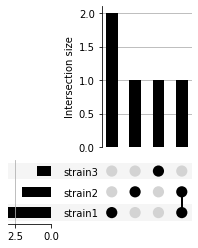

id
strain1 strain2 strain3           
True    False   False    pathway_a
        True    False    pathway_b
        False   False    pathway_c
False   True    False    pathway_d
        False   True     pathway_e

In [2]:
contents = {'strain1': ['pathway_a', 'pathway_b', 'pathway_c'],
            'strain2': ['pathway_b', 'pathway_d'],
            'strain3': ['pathway_e']}
contents = from_contents(contents)

upset = UpSet(contents, subset_size='count')#, intersection_plot_elements=3)
upset.plot()
plt.show()

contents

Reformatting the input data is straightforward:
    1. Load input data as a pandas dataframe
    2. Extract the required fields
    3. Reformat data to an input for upsetplot
    4. Make UpSetPlot

For the input data, we use information generated previously in the file `KEGG_Fisher_Exact_test_all_results.tsv`, `MD5 ec4faa14d08cf6f9ffc4631192127b3a`.

### Load input data as a pandas dataframe

At time of writing, the data does not contain the RNA-Seq data for *Escherichia coli MS14387*, *Streptococcus pyogenes 5448*, *HKU419*, *SP444*. These were aligned on 24/08/2019. Here is how the full dataset looks like:

In [3]:
infile_path = "KEGG_Fisher_Exact_test_all_results.tsv"
data = pandas.read_csv(infile_path, sep="\t")
data.head()

,Species,Strain,Type_of_Experiment,Comparisons,Direction,kegg_pathway_name,kegg_pathway_id,p_value_raw,odds_ratio,FDR,is_de_genes.TRUE|is_gene_set.TRUE,is_de_genes.TRUE|is_gene_set.FALSE,is_de_genes.FALSE|is_gene_set.TRUE,is_de_genes.FALSE|is_gene_set.FALSE,de_gene_with_annotation_list
0,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Pyrimidine metabolism,240,1.601326e-02,1.823092,1.000000e+00,24,446,46,1559,"WP_127820727.1, WP_000763053.1, WP_000120709.1..."
1,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Metabolic pathways,1100,6.745431e-09,1.901218,9.173787e-07,183,287,403,1202,"WP_000451584.1, WP_000176987.1, WP_000651213.1..."
2,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Cysteine and methionine metabolism,270,2.782556e-01,1.275864,1.000000e+00,13,457,35,1570,"WP_000331296.1, WP_000216382.1, WP_000167817.1..."
3,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Biosynthesis of secondary metabolites,1110,2.164623e-06,1.943849,2.900595e-04,95,375,185,1420,"WP_127820724.1, WP_127820744.1, WP_001216915.1..."
4,Streptococcus pneumoniae,4496,RNA-Seq,Sera vs. RPMI + Galactose,Down,Biosynthesis of amino acids,1230,6.001860e-04,1.940969,7.622362e-02,45,425,83,1522,"WP_001216915.1, WP_000191798.1, WP_127820776.1..."


### [EXAMPLE] Extract the required fields

Comparisons of interest:
- ...


In [4]:
print("".join(["Data dimensions: ", str(data.shape)]))
print("".join(["Quantity of experiment types: ", str(len(data.Type_of_Experiment.unique()))]))
print("".join(["Quantity of KEGG pathways: ", str(len(data.kegg_pathway_name.unique()))]))

Data dimensions: (31812, 15)
Quantity of experiment types: 5
Quantity of KEGG pathways: 283


### [EXAMPLE] Reformat data to an input for upsetplot
This block below is an implementation test only (arbitrary group comparisons). We can substitute in comparisons of interest.

In [5]:
# glue the species and strain into a separate column
data["Species_Strain_Type_of_Experiment"] = data["Species"] + " " + data["Strain"] + " " + data["Type_of_Experiment"]

# filter out the data of interest
omics_kegg = data.loc[ : , ['Species_Strain_Type_of_Experiment', 'kegg_pathway_name'] ]

# this is just a test case to test implementation
omics_kegg.drop_duplicates(inplace=True)
collapse_kegg = lambda x: "|".join(x).split("|")
omics_kegg = omics_kegg.groupby(omics_kegg['Species_Strain_Type_of_Experiment']).aggregate({'kegg_pathway_name':collapse_kegg})

# extract only strain B36:[pathways] to test implementation
omics_kegg = omics_kegg.reset_index()
omics_kegg = omics_kegg[omics_kegg["Species_Strain_Type_of_Experiment"].str.contains("B36")]
omics_kegg = omics_kegg.set_index("Species_Strain_Type_of_Experiment")

# reformat into UpSetPlot compatible input
omics_kegg = omics_kegg.to_dict()['kegg_pathway_name']
omics_kegg = from_contents(omics_kegg)
omics_kegg.head()

id
Escherichia coli B36 Metabolomics GC-MS Escherichia coli B36 Metabolomics LC-MS Escherichia coli B36 RNA-Seq                                           
True                                    True                                    True                                             Fatty acid degradation
                                                                                True                                                Lysine biosynthesis
                                                                                True                                                 Lysine degradation
                                                                                True                          Penicillin and cephalosporin biosynthesis
                                                                                True                                    2-Oxocarboxylic acid metabolism

### [EXAMPLE] Make UpSetPlot

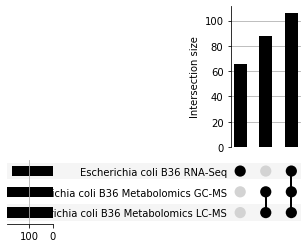

In [6]:
# this is the actual plotting block, the names overlap here but this is fixed in the actual plots
upset = UpSet(omics_kegg, subset_size='count')#, intersection_plot_elements=3)
upset.plot()
plt.show()

## Filtering data to be visualised <a name="filtering"></a>

Pathways will be selected based on a FDR cutoff of less than 0.05 across all pathways. Then, a barplot displaying the quantity of genes will be generated. There are a few ways we can compare the data, across strain, across omics, with pathways, with genes. 

- [Comparing multi-omics data per strain on pathways](#omics_vs_strain)
- [Comparing strain per multi-omics data on pathways](#strain_vs_omics)

<!---
if you see this line pretend its not here, is a hidden note to self
- [Comparing multi-omics data per strain on genes](#omics_vs_strain_genes)
-->


### *WORK IN PROGRESS* Comparing multi-omics data per strain (pathways) <a name="omics_vs_strain"></a>

For cross-omics comparisons within the strain, we first need to filter out results which have one or less multi-omics comparisons possible after filtering data (eg if we have *Bacteria foo* with only RNA-Seq data available, it is meaningless to include this bacterial strain). Any strains removed due to any applied filters are reported. See also [a comparison of strain per multi-omics data](#strain_vs_omics) where there is one plot per omics data type and many strains (rows).

In [7]:
# load data
infile_path = "KEGG_Fisher_Exact_test_all_results.tsv"
data = pandas.read_csv(infile_path, sep="\t")
data["Species_Strain_Type_of_Experiment"] = data["Species"] + " " + data["Strain"] + " " + data["Type_of_Experiment"]
data["Species_Strain"] = data["Species"] + " " + data["Strain"]
data["Species_Strain_Type_of_Experiment_Direction"] = data["Species"] + " " + data["Strain"] + " " + data["Type_of_Experiment"] + " " + data["Direction"]
data["Type_of_Experiment_Direction"] = data["Type_of_Experiment"] + " " + data["Direction"]
all_sp_strains = data["Species"] + " " + data["Strain"]
all_sp_strains_unique = all_sp_strains.unique()

# we want to filter out pathways of interest
# filter out the data points of interest
filter_unit = "FDR"
threshold = 0.05

superset = data.loc[data[filter_unit] > threshold]
subset = data.loc[data[filter_unit] < threshold]
subset_sp_strains = subset["Species"] + " " + subset["Strain"]
subset_sp_strains_unique = subset_sp_strains.unique()
#subset.reset_index(inplace=True)
intermediate_data = subset

removed = set(all_sp_strains_unique) - set(subset_sp_strains_unique)
if removed:
    removed = str(removed)
else:
    removed = "None"

print(" ".join(["Data dimensions before", str(filter_unit), str(threshold), "filter:", str(data.shape)]))
print(" ".join(["Data dimensions after", str(filter_unit), str(threshold), "filter: ", str(subset.shape)]))
print(" ".join(["Strains removed by", str(filter_unit), str(threshold), "filter:", removed]))

Data dimensions before FDR 0.05 filter: (31812, 19)
Data dimensions after FDR 0.05 filter:  (974, 19)
Strains removed by FDR 0.05 filter: {'Escherichia coli MS14387'}


In [8]:
# filter out the categories of interest
omics_kegg = subset.loc[ : , ['Species_Strain_Type_of_Experiment', 'Species_Strain_Type_of_Experiment_Direction', 'kegg_pathway_name', 'Species', 'Strain', 'Type_of_Experiment'] ]
omics_kegg.drop_duplicates(inplace=True)
collapse_kegg = lambda x: "|".join(x).split("|")
omics_kegg = omics_kegg.groupby(omics_kegg['Species_Strain_Type_of_Experiment']).aggregate({'kegg_pathway_name':collapse_kegg})

# if comparing across omics, filter out single-omics entries
sp_strains = data["Species"] + " " + data["Strain"]
sp_strains_unique = sp_strains.unique()
sp_strains_unique.sort()
omics_kegg = omics_kegg.reset_index()
sp_strains = [omics_kegg[omics_kegg["Species_Strain_Type_of_Experiment"].str.contains(sp_strain)] for sp_strain in sp_strains_unique]

filtered = [sp_strain["Species_Strain_Type_of_Experiment"].unique() for sp_strain in sp_strains]
filtered = [x for y in filtered for x in y]
filtered = numpy.array(list(set([" ".join(x.split(" ", 3)[:3]) for x in filtered])))
filtered.sort()

strain_singleomics = list()
strain_multiomics = list()

for sp_strain in sp_strains:
    if len(sp_strain) > 1:
        sp_strain.set_index("Species_Strain_Type_of_Experiment", inplace=True)
        strain_multiomics.append(sp_strain)
    else:
        sp_strain.set_index("Species_Strain_Type_of_Experiment", inplace=True)
        strain_singleomics.append(sp_strain)

strain_singleomics = [x.reset_index()["Species_Strain_Type_of_Experiment"].tolist() for x in strain_singleomics]
strain_singleomics = [x for y in strain_singleomics for x in y]
strain_singleomics = [" ".join(x.split(" ", 3)[:3]) for x in strain_singleomics]
print("No multi-omic comparison available for strain(s):\n", pandas.DataFrame(strain_singleomics))

#strain_multiomics

No multi-omic comparison available for strain(s):
                                  0
0             Escherichia coli B36
1  Streptococcus pneumoniae 180/15
2   Streptococcus pneumoniae 180/2
3    Streptococcus pneumoniae 4496
4     Streptococcus pneumoniae 947
5      Streptococcus pyogenes 5448
6    Streptococcus pyogenes HKU419


Note that figure legends below are shortened as they overlap with figure elements. "M" replaces instances of "Metabolomics" and "P" replaces instances of "Proteomics".

/home/chen/miniconda3/envs/doc/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/chen/miniconda3/envs/doc/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


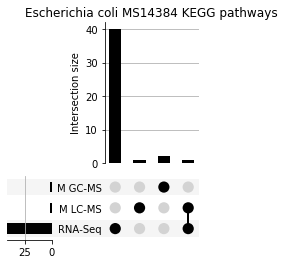

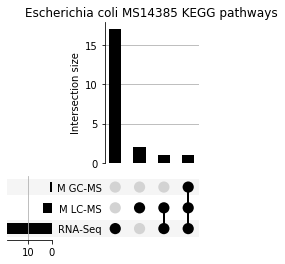

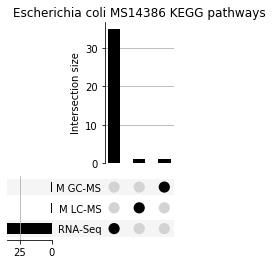

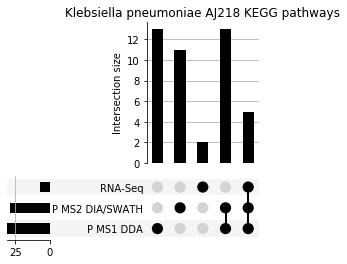

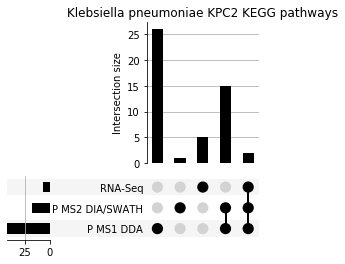

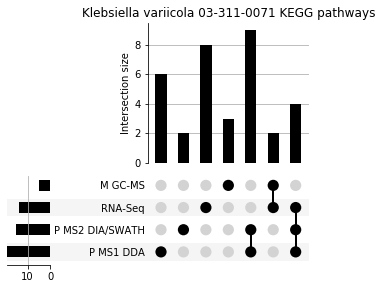

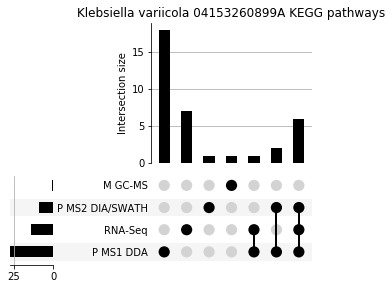

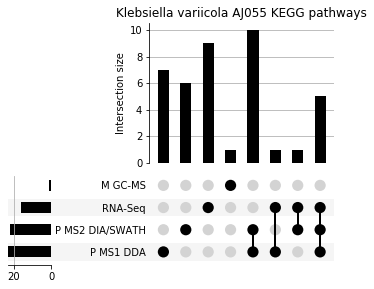

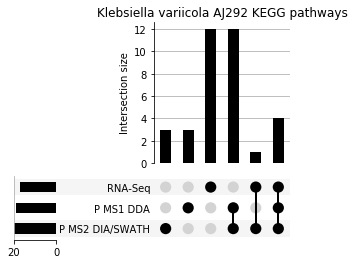

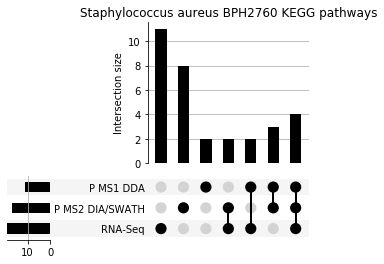

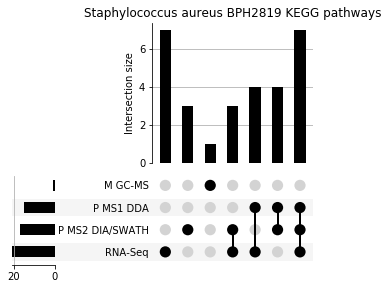

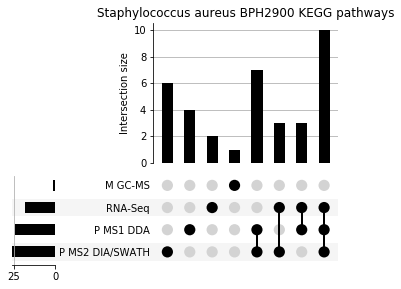

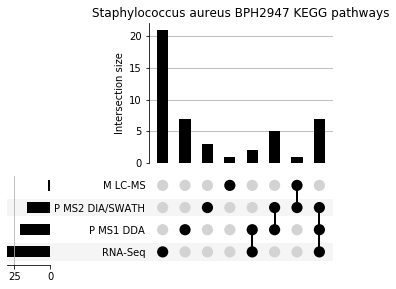

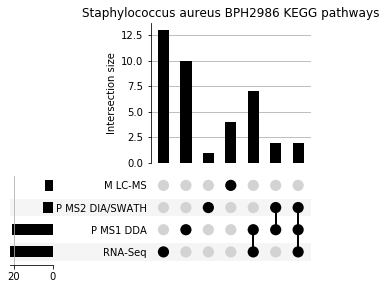

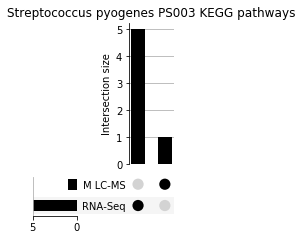

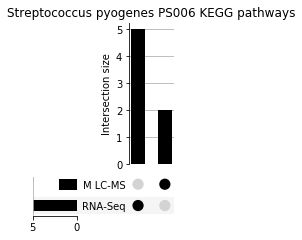

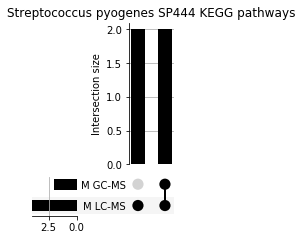

In [9]:
# the plotting block
for strain_multiomic in strain_multiomics:
    # legends too long and run off page, shorten
    strain_multiomic.reset_index(inplace=True)
    old_index = strain_multiomic["Species_Strain_Type_of_Experiment"]
    plt_title = [" ".join(x.split(" ", 3)[:3]) for x in old_index.tolist()]
    assert len(set(plt_title)) is 1, "There seems to be more than one species present within one comparison"
    new_index = [" ".join(x.split(" ", 3)[3:]) for x in old_index.tolist()]
    new_index = [omic.replace("Metabolomics", "M") for omic in new_index]
    new_index = [omic.replace("Proteomics", "P") for omic in new_index]
    strain_multiomic["Species_Strain_Type_of_Experiment"] = new_index
    strain_multiomic.set_index("Species_Strain_Type_of_Experiment", inplace=True)
    
    # removes pathways duplicated within a single strain
    strain_multiomic["kegg_pathway_name"] = strain_multiomic["kegg_pathway_name"].apply(set).apply(list).apply(sorted)
    strain_multiomic = strain_multiomic.to_dict()["kegg_pathway_name"]
    strain_multiomic = from_contents(strain_multiomic)
    upset = UpSet(strain_multiomic, subset_size='count')#, intersection_plot_elements=3)
    upset.plot()
    plt.title(" ".join([plt_title[0], "KEGG pathways"]))
    plt.show()

### *WORK IN PROGRESS* Comparing strain per multi-omics data (pathways) <a name="strain_vs_omics"></a>

Now we compare the strains (as rows in the Upset plot), with one plot per type of omics experiment. This way we can start finding pathways that are common across strains. [Procedure similar to comparing multi-omics data per strain](#omics_vs_strain). So we will end up with one plot per omics data, and many strains (rows). Strains which are dropped due to lack of overlap are listed.

In [10]:
# some helper functions are defined here to automate repetitive tasks
def reformat_data_for_upsetplot(data, column):
    """
    Take a dataframes to be plotted, desired categories, return labelled list of reformatted dataframes
    """
    omics_kegg = data
    omics = omics_kegg[column].unique()
    omics.sort()
    omics_kegg = [omics_kegg[omics_kegg[column].str.contains(omic)] for omic in omics]
    collapse_kegg = lambda x: "|".join(x).split("|")
    omics_kegg = [omic_kegg.groupby(omic_kegg['Species_Strain']).aggregate({'kegg_pathway_name':collapse_kegg}) for omic_kegg in omics_kegg]
    before = [omic.shape[0] for omic in omics_kegg]
    omics_kegg = [omic_kegg.loc[omic_kegg.astype(str).drop_duplicates().index] for omic_kegg in omics_kegg]
    after = [omic.shape[0] for omic in omics_kegg]
    duplicates_dropped = [i - j for i, j in zip(before, after)]
    duplicates_per_exp = list(zip(omics, duplicates_dropped))

    # removes pathways duplicated within a single strain
    temp = list()
    for omic in omics_kegg:
        omic["kegg_pathway_name"] = omic["kegg_pathway_name"].apply(set).apply(list).apply(sorted)
        temp.append(omic)
    omics_kegg = temp
    [print(omic, "as one plot") for omic in omics]

    # display non-overlapping strains
    sp_strains = data["Species"] + " " + data["Strain"]
    sp_strains_unique = sp_strains.unique()
    sp_strains_unique.sort()
    dropped_strains = [list(x) for x in [set(sp_strains_unique) - set(index) for index in [omic.index for omic in omics_kegg]]]
    dropped_strains = list(zip(omics, dropped_strains))
    [print("\nStrains dropped from", omic, "data as they had no KEGG pathway overlap:\n", pandas.DataFrame(strain)) for omic, strain in dropped_strains]
    return list(zip(omics, omics_kegg))

def make_upsetplot(data):
    """
    Take list of label, dataframe, plot upsetplots
    """
    for plt_title, strain_multiomic in data:
        # legends too long and run off page, shorten
        strain_multiomic.reset_index(inplace=True)
        old_index = strain_multiomic["Species_Strain"].tolist()
        assert len(set([plt_title])) is 1, "There seems to be more than one species present within one comparison"

        # shorten items to prevent legends going off page
        shortened = [
            ("Escherichia coli", "E. coli"), 
            ("Klebsiella pneumoniae", "K. pneu"),
            ("Klebsiella variicola", "K. var"), 
            ("Staphylococcus aureus", "S. aur"), 
            ("Streptococcus pneumoniae", "S. pneu"),
            ("Streptococcus pyogenes", "S. pyo")
        ] 
        new_index = list()    
        for omic in old_index:
            for long, short in shortened:
                omic = omic.replace(long, short)
            new_index.append(omic)

        strain_multiomic["Species_Strain"] = new_index
        strain_multiomic.set_index("Species_Strain", inplace=True)

        # reformat data to UpSetPlot format
        strain_multiomic = strain_multiomic.to_dict()['kegg_pathway_name']
        strain_multiomic = from_contents(strain_multiomic)
        upset = UpSet(strain_multiomic, subset_size='count', element_size=50)#, intersection_plot_elements=3)
        upset.plot()
        plt.title(" ".join([plt_title, "KEGG pathways"]))
        plt.show()

In [11]:
# we saved this data earlier, no need to reload
subset = intermediate_data
print(" ".join(["Data dimensions before", str(filter_unit), str(threshold), "filter:", str(data.shape)]))
print(" ".join(["Data dimensions after", str(filter_unit), str(threshold), "filter: ", str(subset.shape)]))
print(" ".join(["Strains removed by", str(filter_unit), str(threshold), "filter:", removed]))

# filter out the categories of interest
omics_kegg = subset.loc[ : , ['Species_Strain', 'Species_Strain_Type_of_Experiment', 'kegg_pathway_name', 'Species', 'Strain', 'Type_of_Experiment'] ]
omics_kegg.drop_duplicates(inplace=True)

# we want one plot per omics type
omics = omics_kegg['Type_of_Experiment'].unique()
omics.sort()
[print(omic, "as one plot") for omic in omics]

omics_kegg = [omics_kegg[omics_kegg["Species_Strain_Type_of_Experiment"].str.contains(omic)] for omic in omics]
collapse_kegg = lambda x: "|".join(x).split("|")
omics_kegg = [omic_kegg.groupby(omic_kegg['Species_Strain']).aggregate({'kegg_pathway_name':collapse_kegg}) for omic_kegg in omics_kegg]

# display non-overlapping strains
sp_strains = data["Species"] + " " + data["Strain"]
sp_strains_unique = sp_strains.unique()
sp_strains_unique.sort()
dropped_strains = [list(x) for x in [set(sp_strains_unique) - set(index) for index in [omic.index for omic in omics_kegg]]]
dropped_strains = list(zip(omics, dropped_strains))
[print("\nStrains dropped from", omic, "data as they had no KEGG pathway overlap:\n", pandas.DataFrame(strain)) for omic, strain in dropped_strains]

omics_kegg = list(zip(omics, omics_kegg))

Data dimensions before FDR 0.05 filter: (31812, 19)
Data dimensions after FDR 0.05 filter:  (974, 19)
Strains removed by FDR 0.05 filter: {'Escherichia coli MS14387'}
Metabolomics GC-MS as one plot
Metabolomics LC-MS as one plot
Proteomics MS1 DDA as one plot
Proteomics MS2 DIA/SWATH as one plot
RNA-Seq as one plot

Strains dropped from Metabolomics GC-MS data as they had no KEGG pathway overlap:
                                   0
0      Streptococcus pyogenes PS006
1        Klebsiella pneumoniae KPC2
2        Klebsiella variicola AJ292
3     Streptococcus pyogenes HKU419
4     Staphylococcus aureus BPH2947
5      Streptococcus pneumoniae 947
6       Streptococcus pyogenes 5448
7       Klebsiella pneumoniae AJ218
8     Streptococcus pneumoniae 4496
9    Streptococcus pneumoniae 180/2
10  Streptococcus pneumoniae 180/15
11     Streptococcus pyogenes PS003
12             Escherichia coli B36
13    Staphylococcus aureus BPH2986
14    Staphylococcus aureus BPH2760
15         Escherichia 

In the first instance each assay is treated as independent, ie GC-MS and LC-MS are kept separate although they are both proteomics to review any instrument effects. In the next section, each omics is treated as independent, so it will be a comparison of Metabolomics, Proteomics and Transcriptiomics.

<!---
### *TODO* Comparing multi-omics data per strain (genes) <a name="omics_vs_strain_genes"></a>
--->

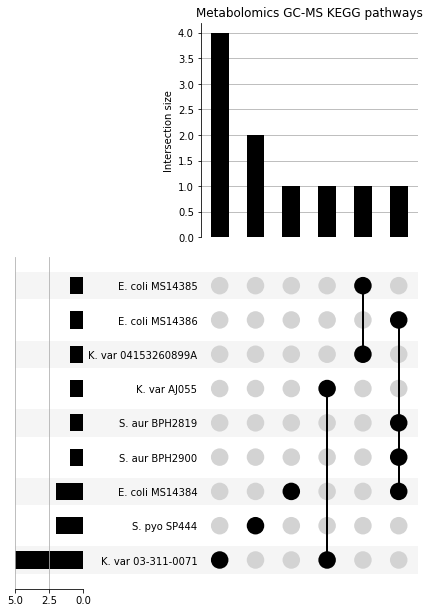

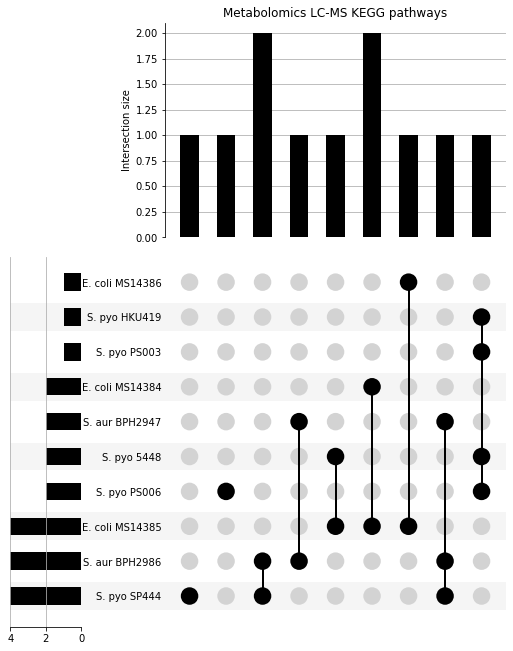

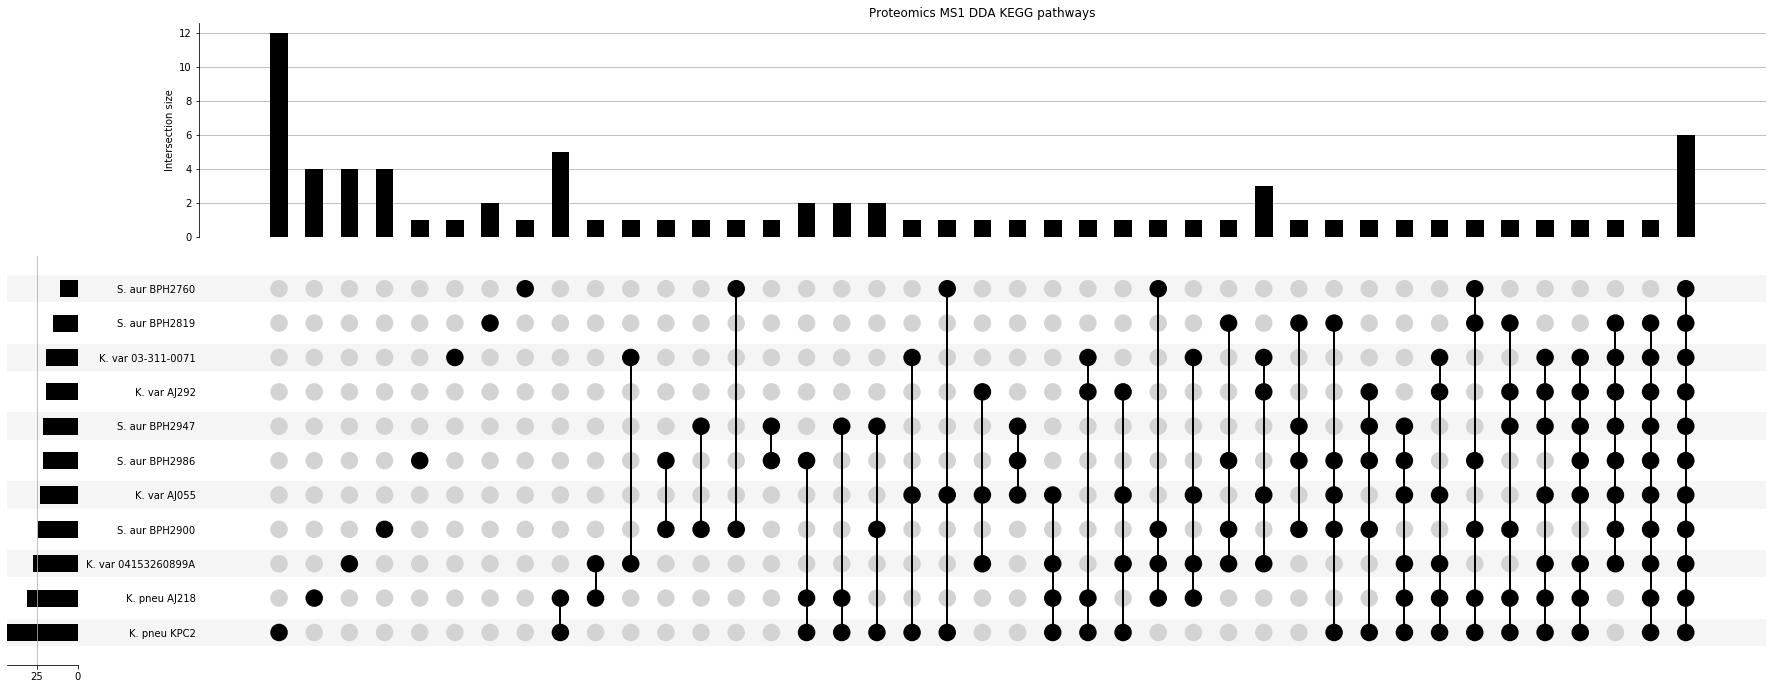

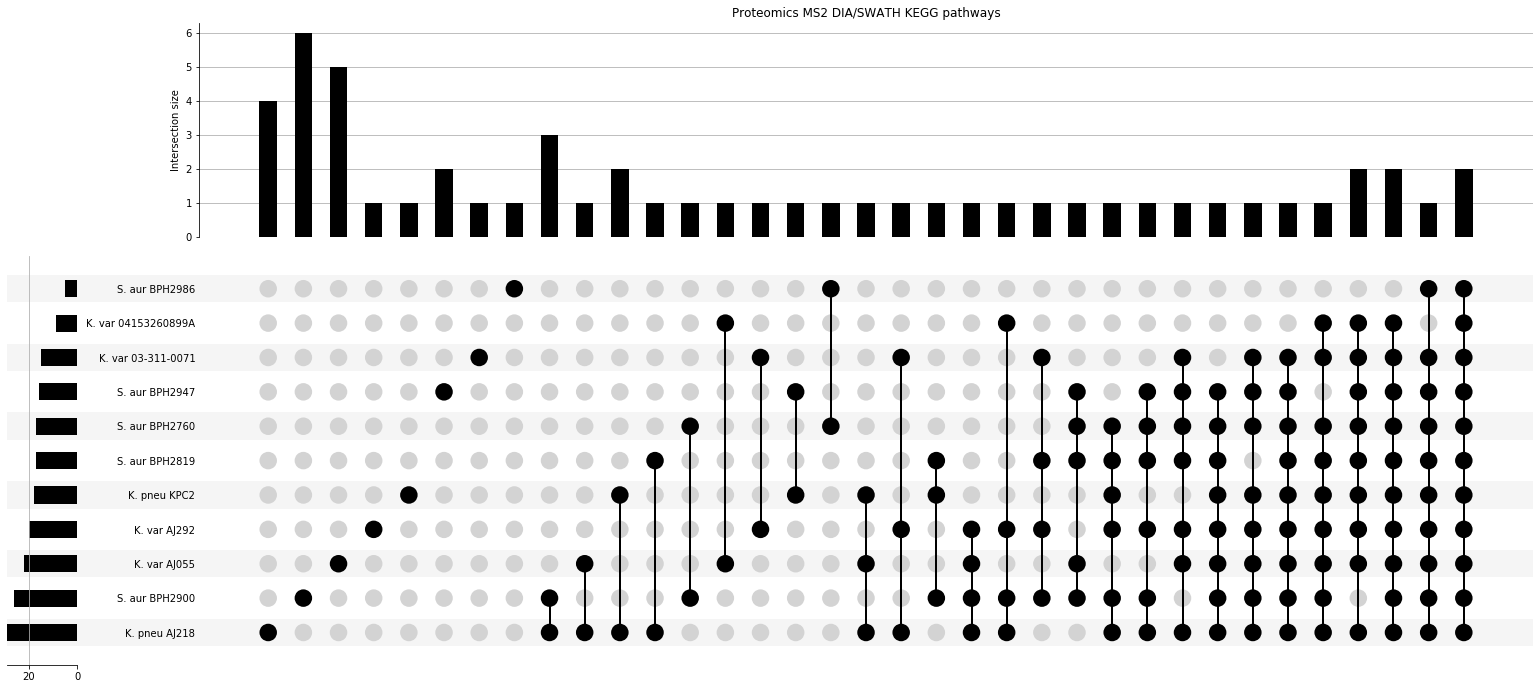

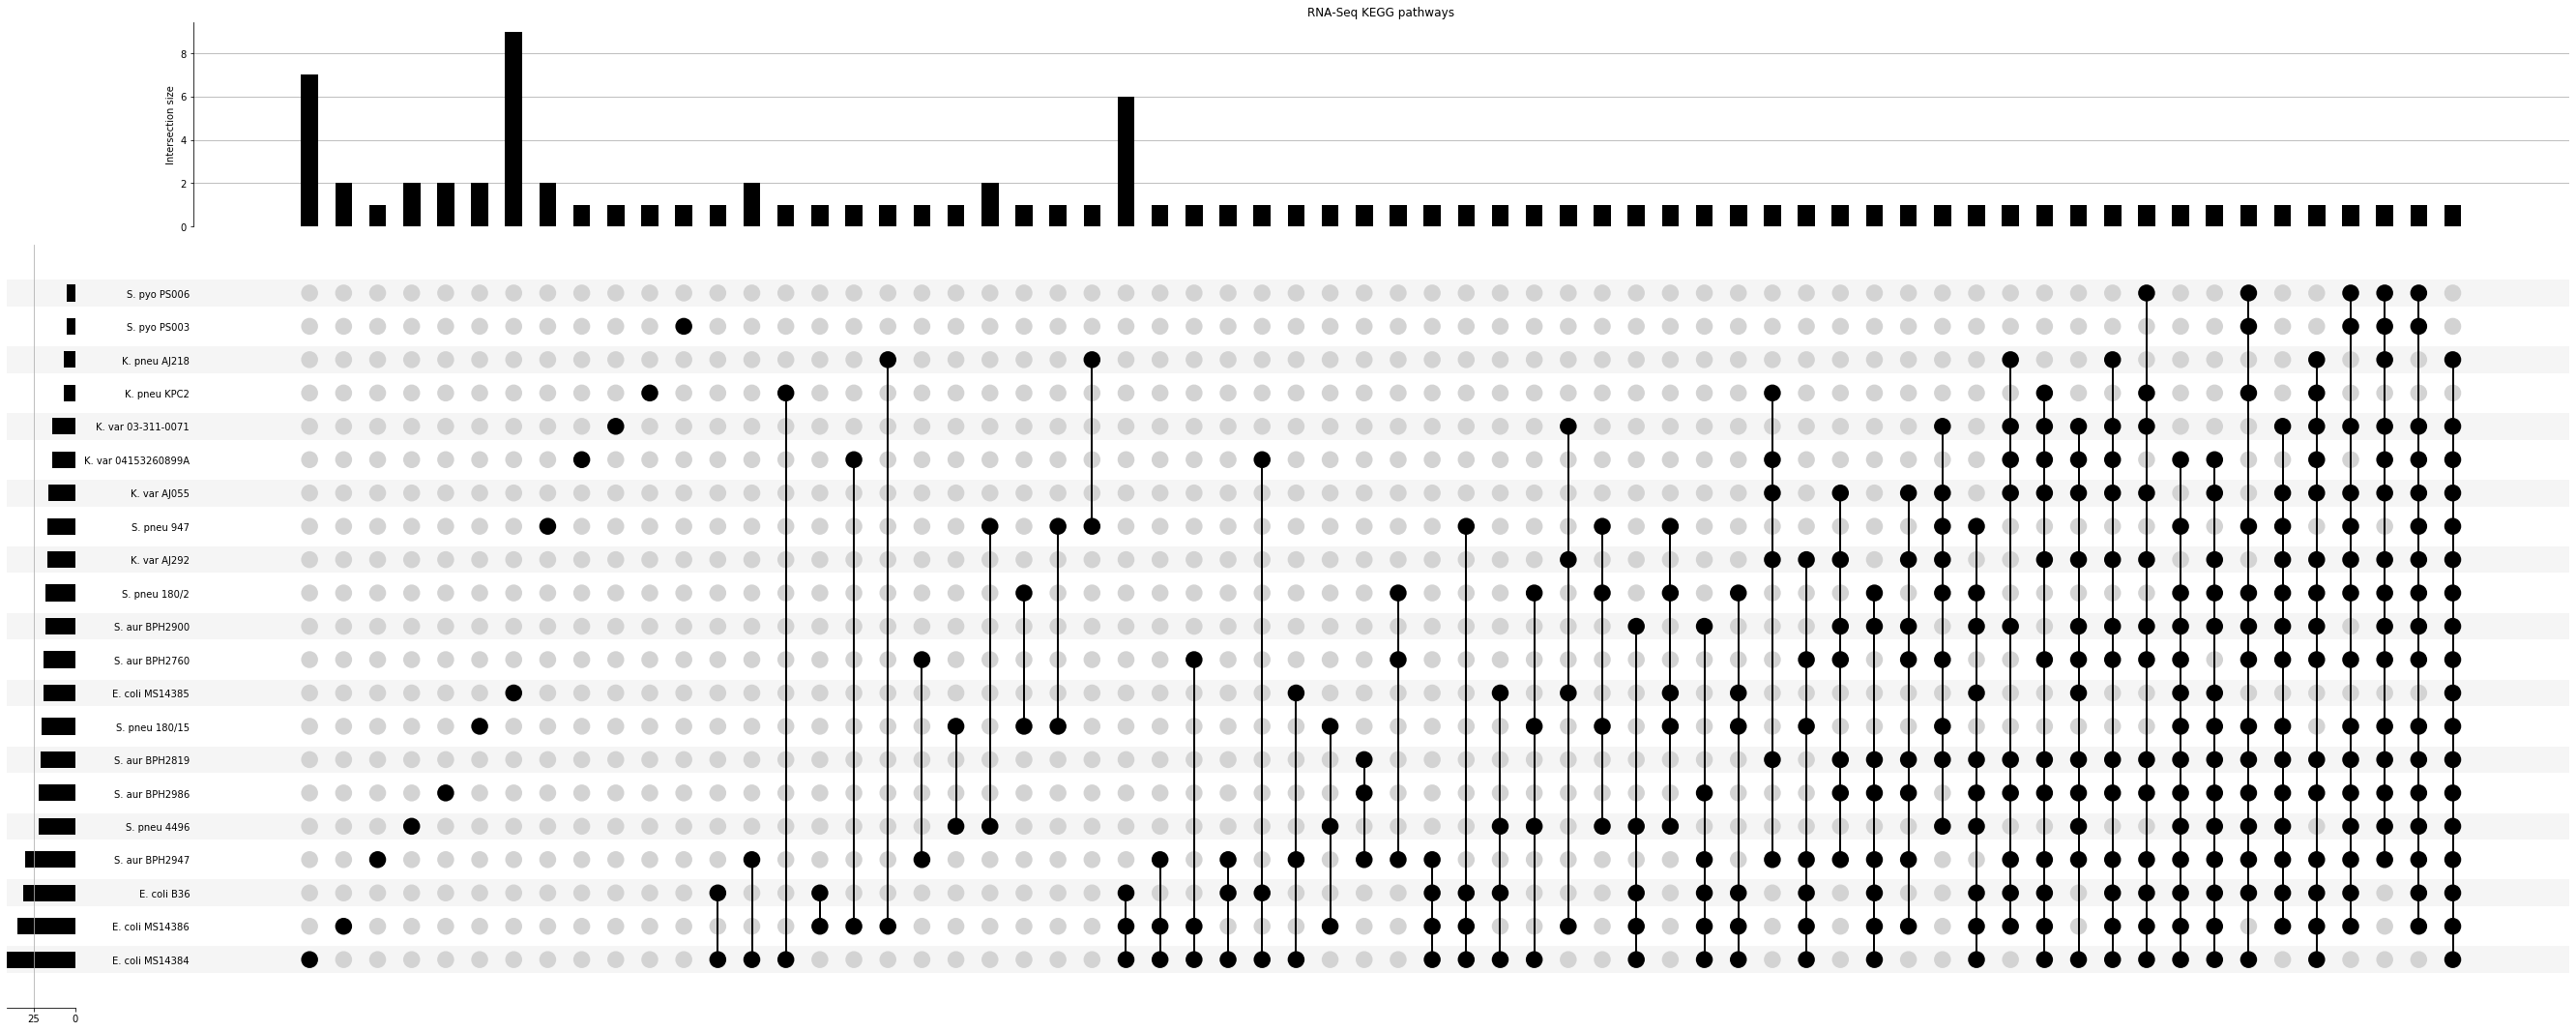

In [12]:
for plt_title, strain_multiomic in omics_kegg:
    # legends too long and run off page, shorten
    strain_multiomic.reset_index(inplace=True)
    old_index = strain_multiomic["Species_Strain"].tolist()
    assert len(set([plt_title])) is 1, "There seems to be more than one species present within one comparison"
    
    # shorten items to prevent legends going off page
    shortened = [
        ("Escherichia coli", "E. coli"), 
        ("Klebsiella pneumoniae", "K. pneu"),
        ("Klebsiella variicola", "K. var"), 
        ("Staphylococcus aureus", "S. aur"), 
        ("Streptococcus pneumoniae", "S. pneu"),
        ("Streptococcus pyogenes", "S. pyo")
    ] 
    new_index = list()    
    for omic in old_index:
        for long, short in shortened:
            omic = omic.replace(long, short)
        new_index.append(omic)
        
    strain_multiomic["Species_Strain"] = new_index
    strain_multiomic.set_index("Species_Strain", inplace=True)
    
    # reformat data to UpSetPlot format
    strain_multiomic = strain_multiomic.to_dict()['kegg_pathway_name']
    contents = strain_multiomic
    strain_multiomic = from_contents(strain_multiomic)
    
    # make the plot
    upset = UpSet(strain_multiomic, subset_size='count', element_size=50)#, intersection_plot_elements=3)
    upset.plot()
    plt.title(" ".join([plt_title, "KEGG pathways"]))
    plt.show()


Below is a comparison of omics data (Metabolomics, Proteomics and Transcriptomics).

In [13]:
# collapse across GC-MS and LC-MS
subset = intermediate_data
omics_kegg = subset.loc[ : , ['Species_Strain', 'Species_Strain_Type_of_Experiment', 'kegg_pathway_name', 'Species', 'Strain', 'Type_of_Experiment', 'Direction', 'Type_of_Experiment_Direction'] ]
omics_kegg.drop_duplicates(inplace=True)
before = omics_kegg.shape

# metabolomics block, also split into subsets based on regulation state (up or down)
metabolomics = omics_kegg[omics_kegg.Type_of_Experiment.str.startswith("Metabolomics")]
metabolomics["Type_of_Experiment"] = "Metabolomics"
metabolomics["Type_of_Experiment_Direction"] = metabolomics["Type_of_Experiment"] + " " + metabolomics["Direction"]
metabolomics_up = metabolomics[metabolomics["Direction"] == "Down"]
metabolomics_dn = metabolomics[metabolomics["Direction"] == "Up"]
assert (metabolomics.shape[0]) == (metabolomics_up.shape[0] + metabolomics_dn.shape[0]), "Total pathways surveyed should be the same"

# proteomics block, also split into subsets based on regulation state (up or down)
proteomics = omics_kegg[omics_kegg.Type_of_Experiment.str.startswith("Proteomics")]
proteomics["Type_of_Experiment"] = "Proteomics"
proteomics["Type_of_Experiment_Direction"] = proteomics["Type_of_Experiment"] + " " + proteomics["Direction"]
proteomics_up = proteomics[proteomics["Direction"] == "Down"]
proteomics_dn = proteomics[proteomics["Direction"] == "Up"]
assert (proteomics.shape[0]) == (proteomics_up.shape[0] + proteomics_dn.shape[0]), "Total pathways surveyed should be the same"

# rnaseq block, also split into subsets based on regulation state (up or down)
rna_seq = omics_kegg[omics_kegg.Type_of_Experiment.str.startswith("RNA-Seq")]
rna_seq["Type_of_Experiment"] = "RNA-Seq"
rna_seq["Type_of_Experiment_Direction"] = rna_seq["Type_of_Experiment"] + " " + rna_seq["Direction"]
rna_seq_up = rna_seq[rna_seq["Direction"] == "Down"]
rna_seq_dn = rna_seq[rna_seq["Direction"] == "Up"]
assert (rna_seq.shape[0]) == (rna_seq_up.shape[0] + rna_seq_dn.shape[0]), "Total pathways surveyed should be the same"

omics_kegg = pandas.concat([rna_seq, metabolomics, proteomics], verify_integrity=True, sort=True)
omics_kegg_direction = pandas.concat([rna_seq_up, rna_seq_dn, metabolomics_up, metabolomics_dn, proteomics_up, proteomics_dn], verify_integrity=True, sort=True)

assert before == omics_kegg.shape
assert before == omics_kegg_direction.shape, "Original and recombined data must have identical dimensions!"
omics_kegg.drop_duplicates(inplace=True)
omics_kegg_direction.drop_duplicates(inplace=True)

omics_kegg = reformat_data_for_upsetplot(omics_kegg, "Type_of_Experiment")

Metabolomics as one plot
Proteomics as one plot
RNA-Seq as one plot

Strains dropped from Metabolomics data as they had no KEGG pathway overlap:
                                   0
0        Klebsiella variicola AJ292
1        Klebsiella pneumoniae KPC2
2      Streptococcus pneumoniae 947
3       Klebsiella pneumoniae AJ218
4     Streptococcus pneumoniae 4496
5    Streptococcus pneumoniae 180/2
6   Streptococcus pneumoniae 180/15
7      Streptococcus pyogenes PS003
8              Escherichia coli B36
9     Staphylococcus aureus BPH2760
10    Staphylococcus aureus BPH2900

Strains dropped from Proteomics data as they had no KEGG pathway overlap:
                                   0
0      Streptococcus pyogenes PS006
1     Streptococcus pyogenes HKU419
2      Streptococcus pneumoniae 947
3       Streptococcus pyogenes 5448
4      Streptococcus pyogenes SP444
5     Streptococcus pneumoniae 4496
6    Streptococcus pneumoniae 180/2
7          Escherichia coli MS14386
8          Escherichia

/home/chen/miniconda3/envs/doc/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/chen/miniconda3/envs/doc/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/chen/miniconda3/envs/doc/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

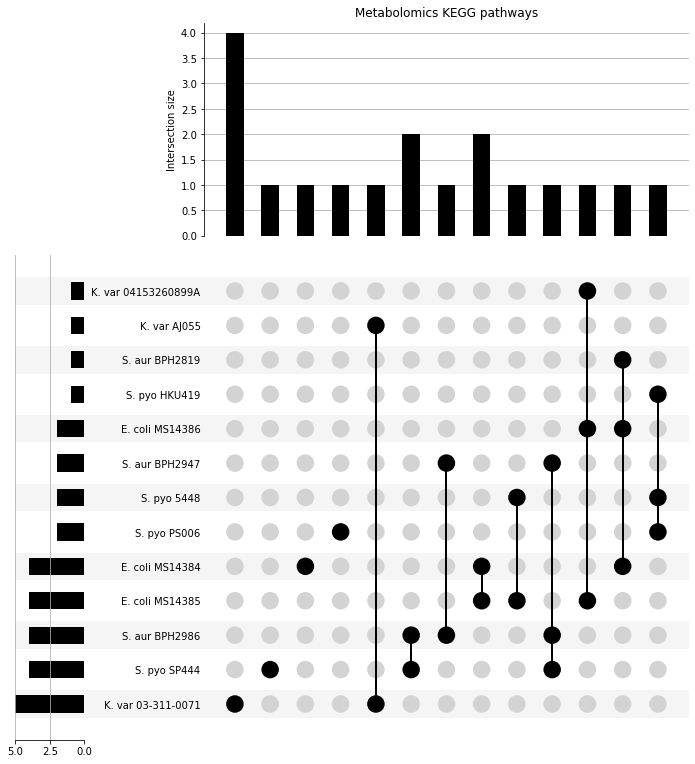

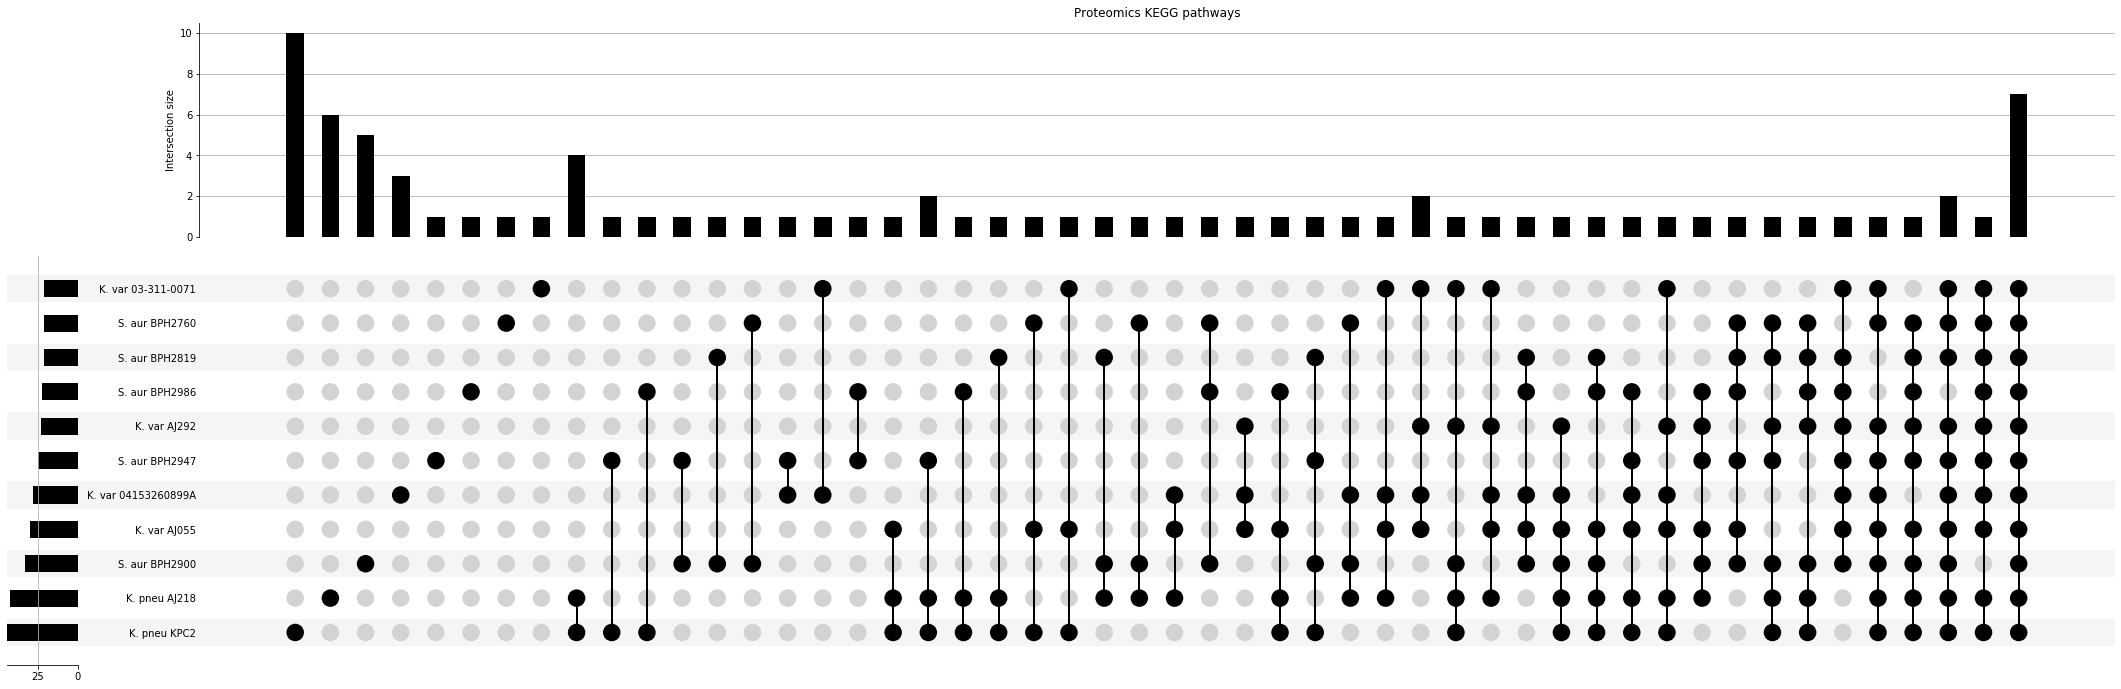

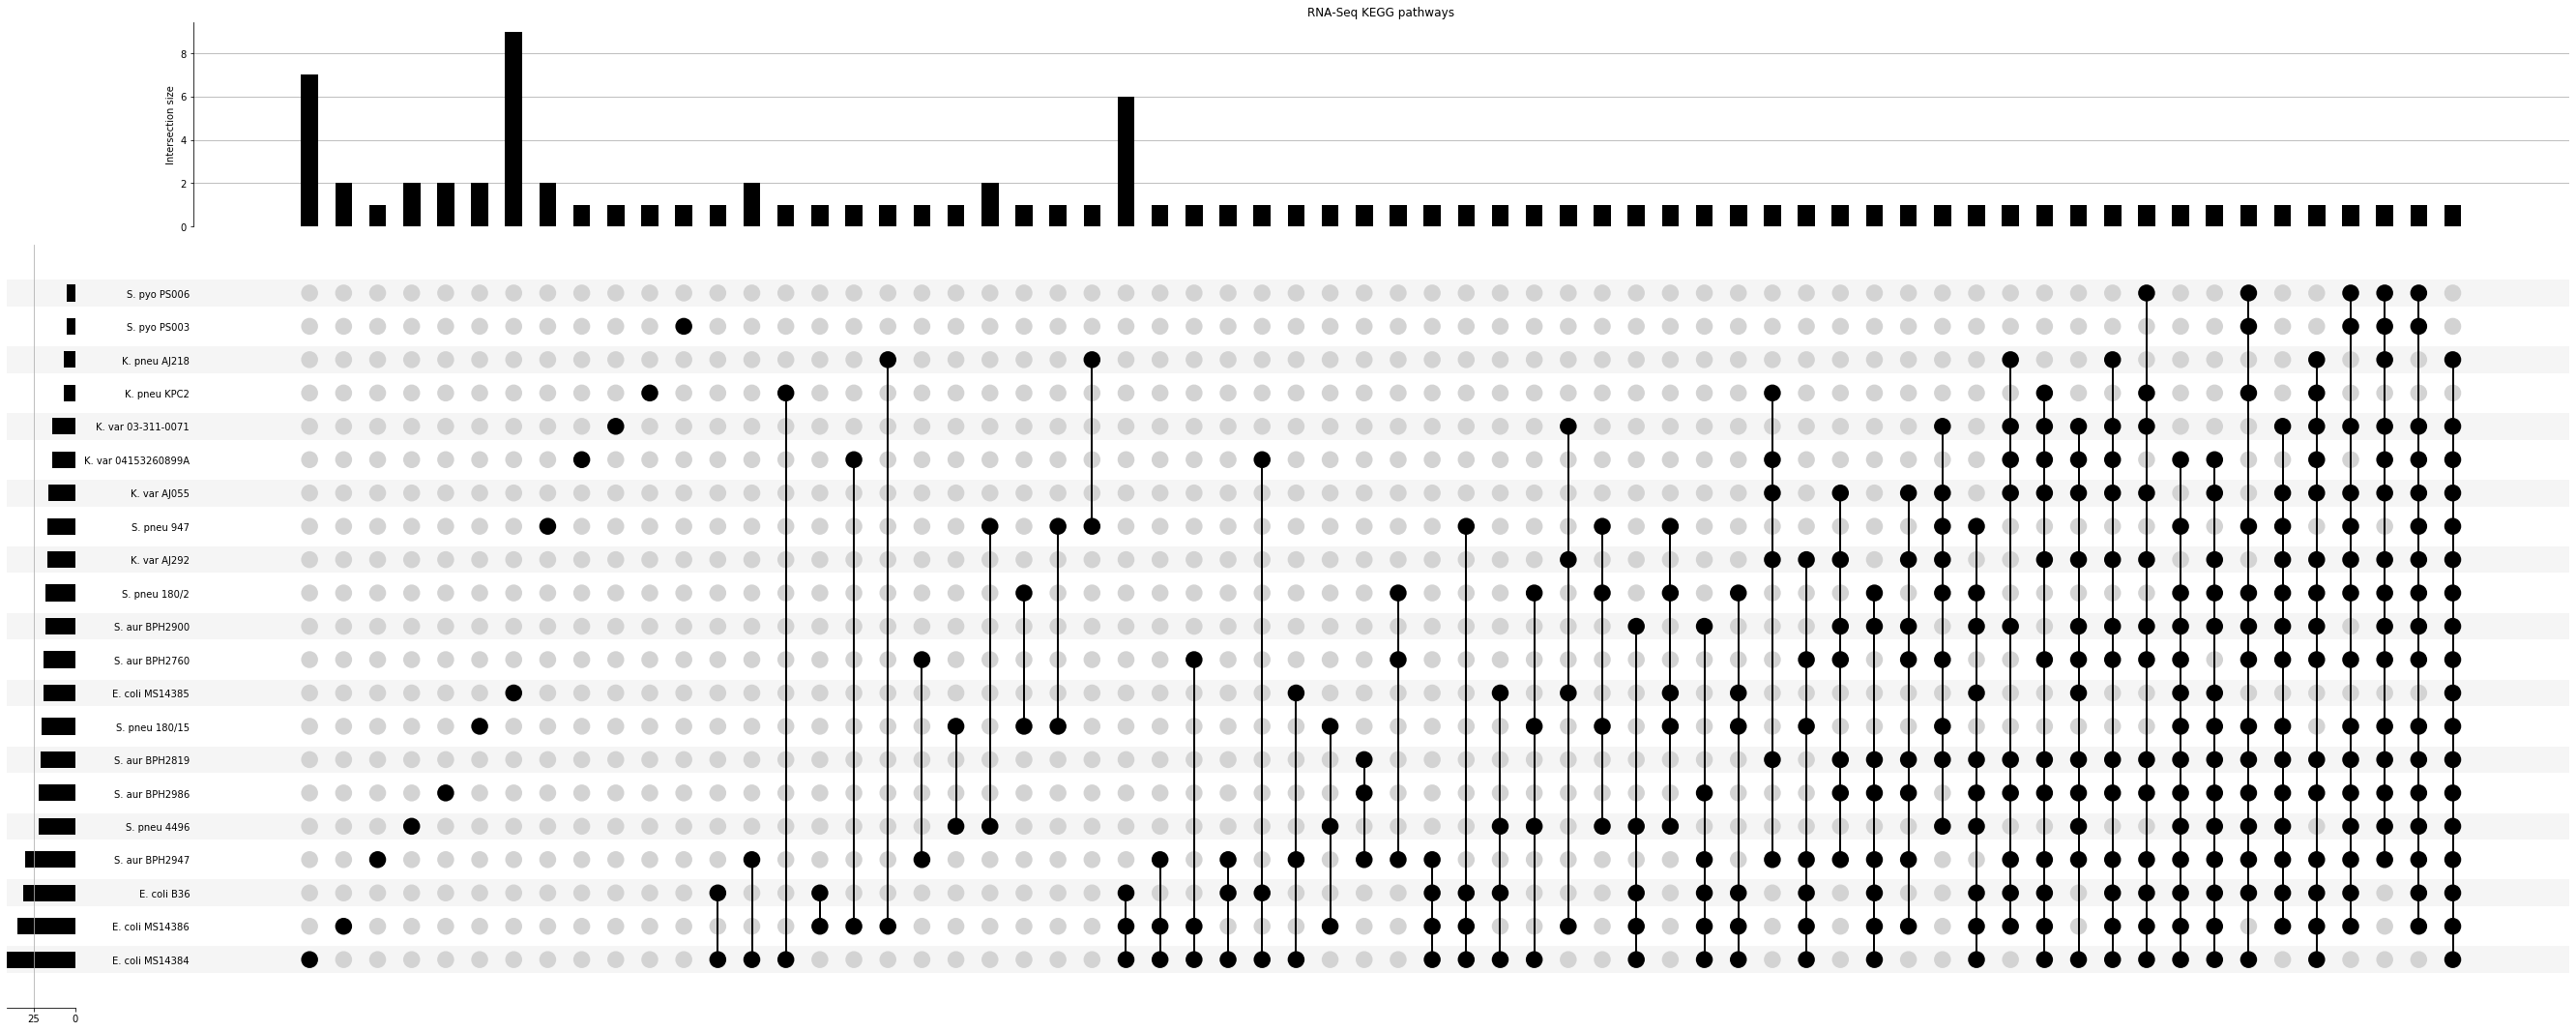

In [14]:
make_upsetplot(omics_kegg)

Omics data (Metabolomics, Proteomics and Transcriptomics) is further subsetted into *Upregulated* and *Downregulated* components.

Metabolomics Down as one plot
Metabolomics Up as one plot
Proteomics Down as one plot
Proteomics Up as one plot
RNA-Seq Down as one plot
RNA-Seq Up as one plot

Strains dropped from Metabolomics Down data as they had no KEGG pathway overlap:
                                     0
0       Staphylococcus aureus BPH2947
1       Streptococcus pyogenes HKU419
2         Streptococcus pyogenes 5448
3         Klebsiella pneumoniae AJ218
4       Streptococcus pneumoniae 4496
5            Escherichia coli MS14386
6       Staphylococcus aureus BPH2819
7     Streptococcus pneumoniae 180/15
8        Streptococcus pyogenes PS003
9                Escherichia coli B36
10      Staphylococcus aureus BPH2760
11         Klebsiella variicola AJ292
12         Klebsiella pneumoniae KPC2
13       Streptococcus pneumoniae 947
14  Klebsiella variicola 04153260899A
15       Streptococcus pyogenes SP444
16     Streptococcus pneumoniae 180/2
17      Staphylococcus aureus BPH2986
18      Staphylococcus aureus BPH29

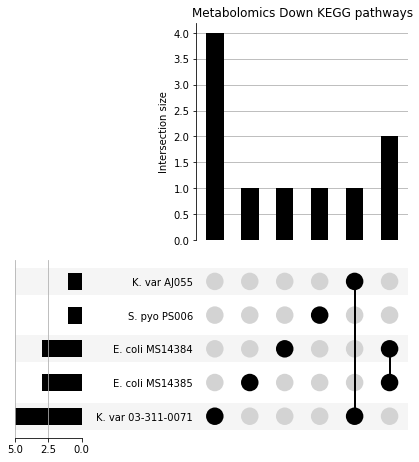

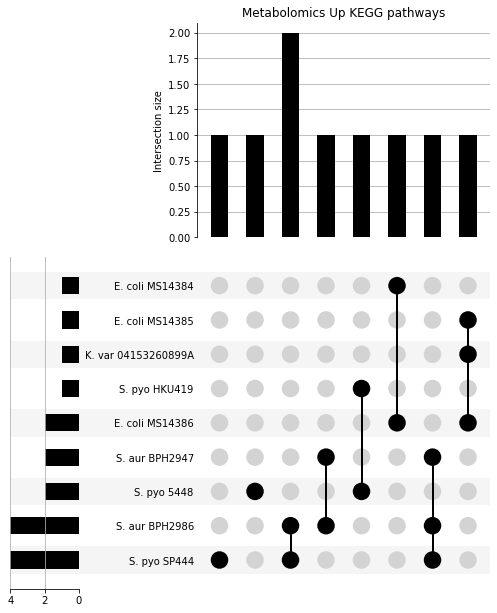

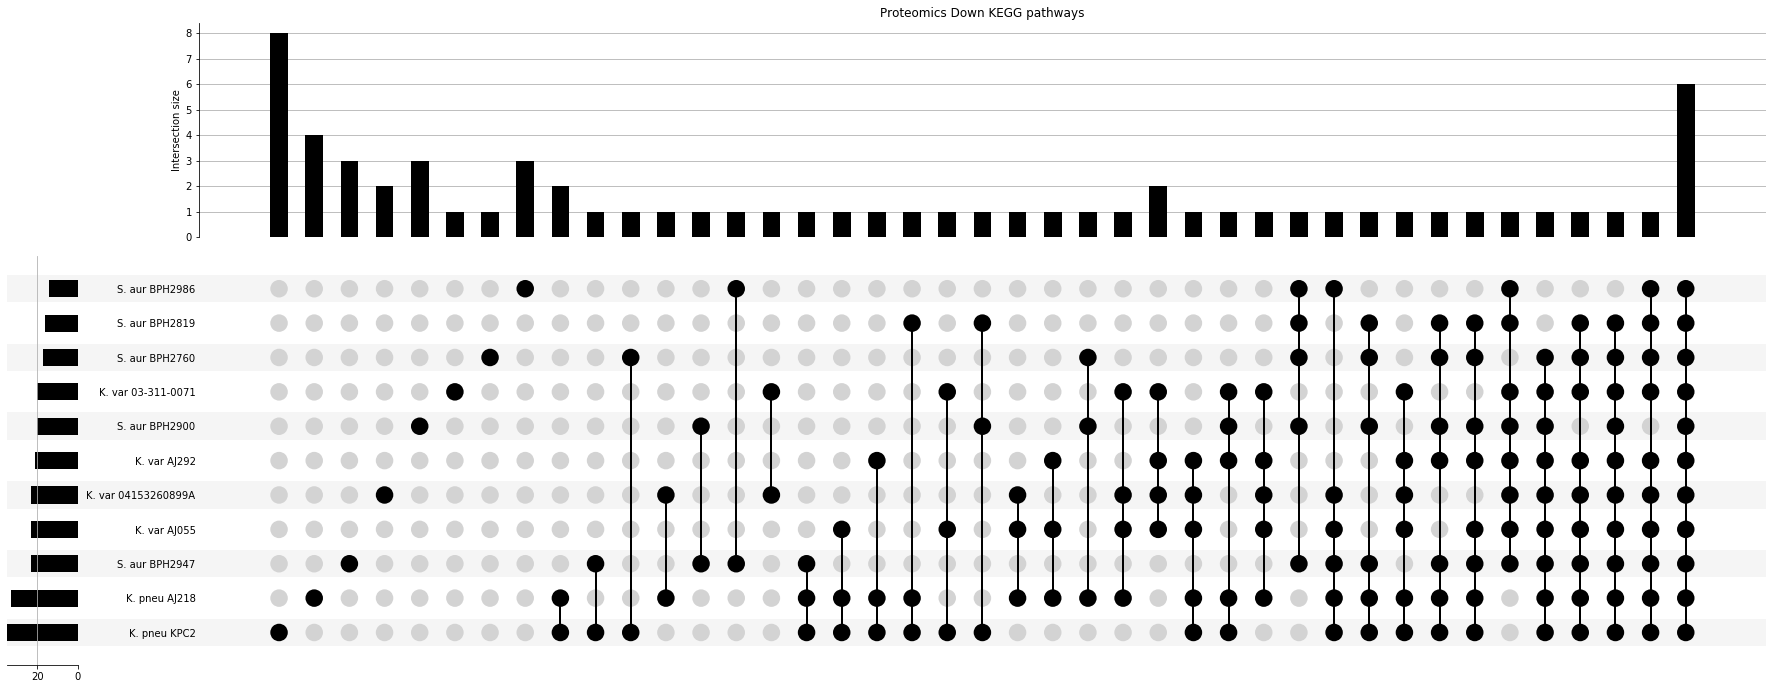

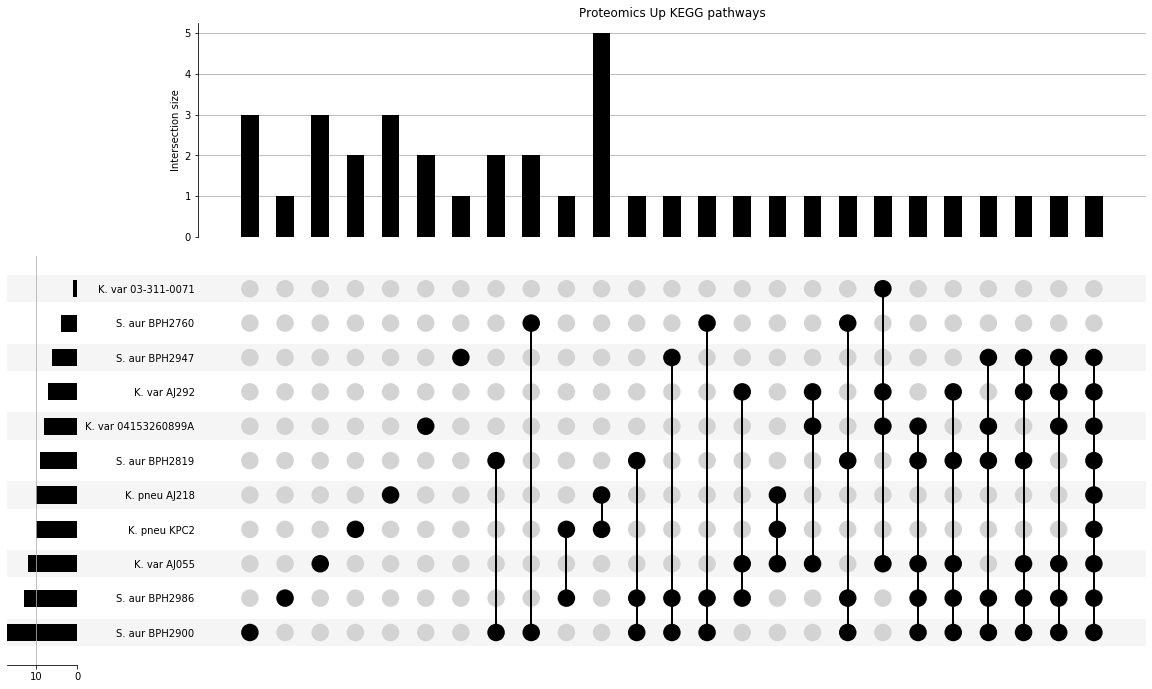

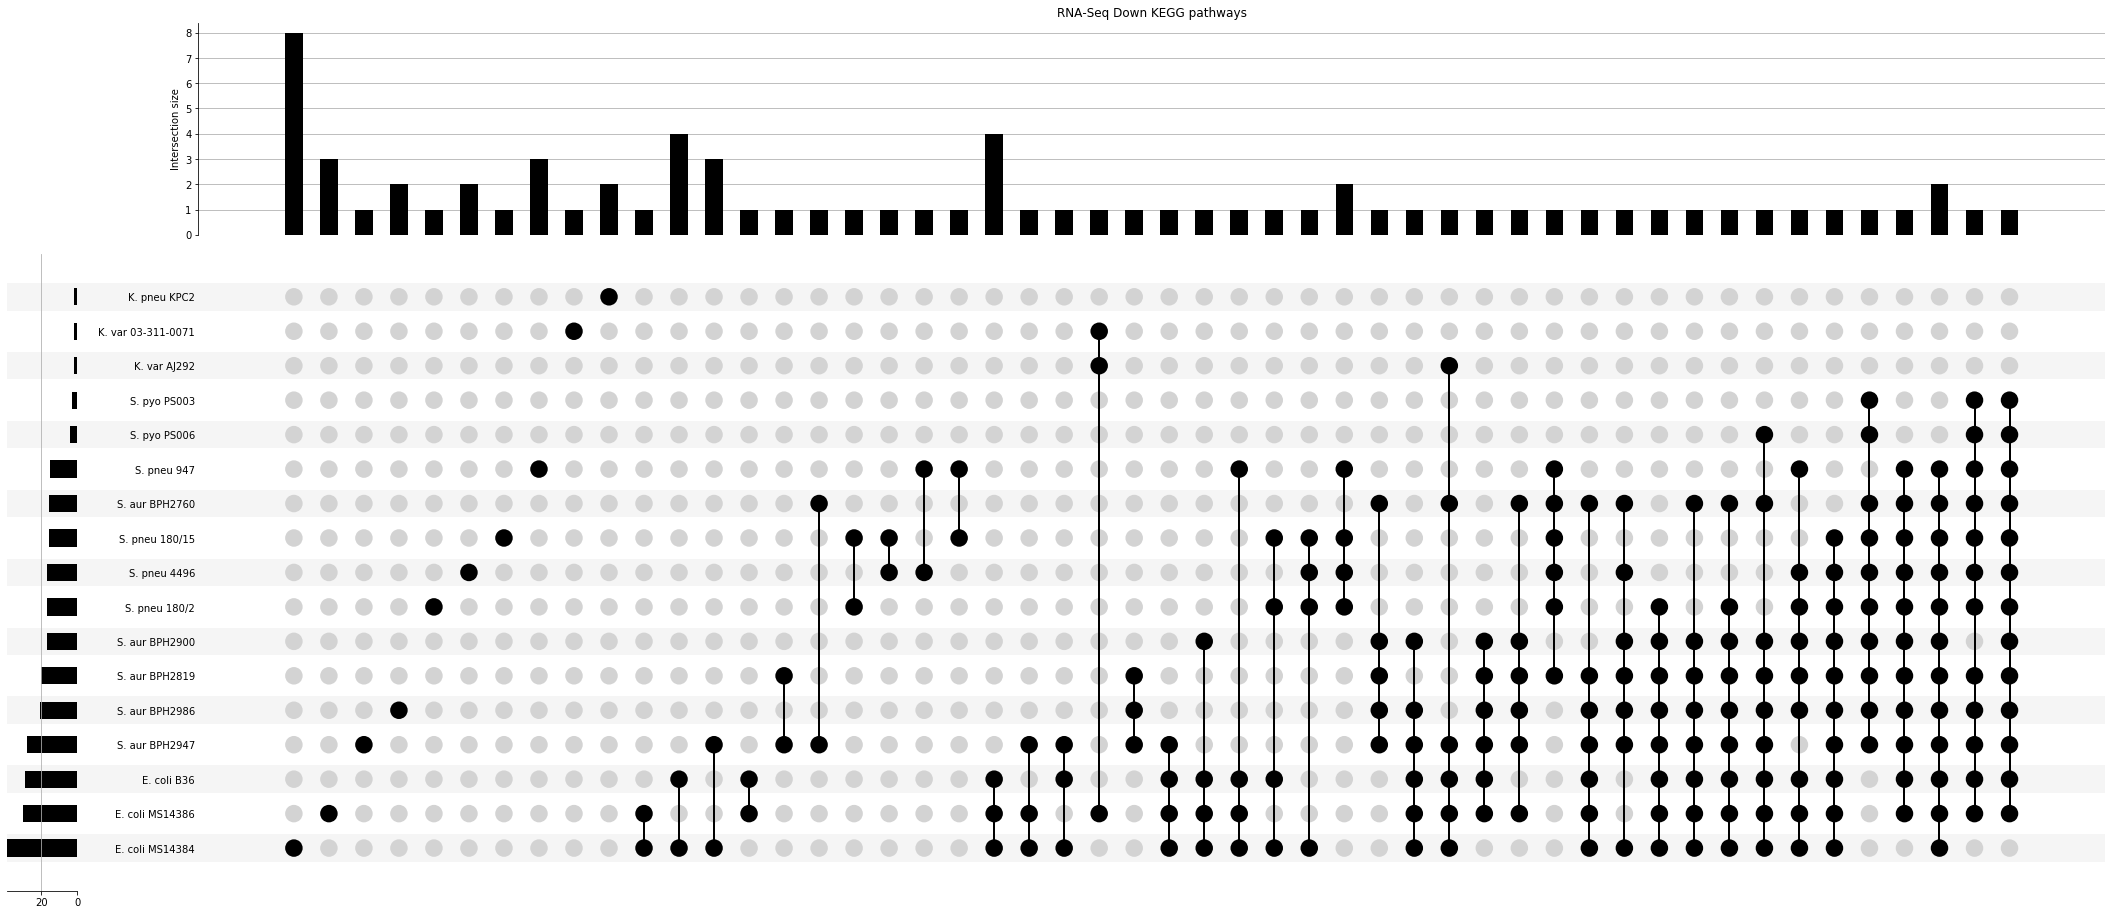

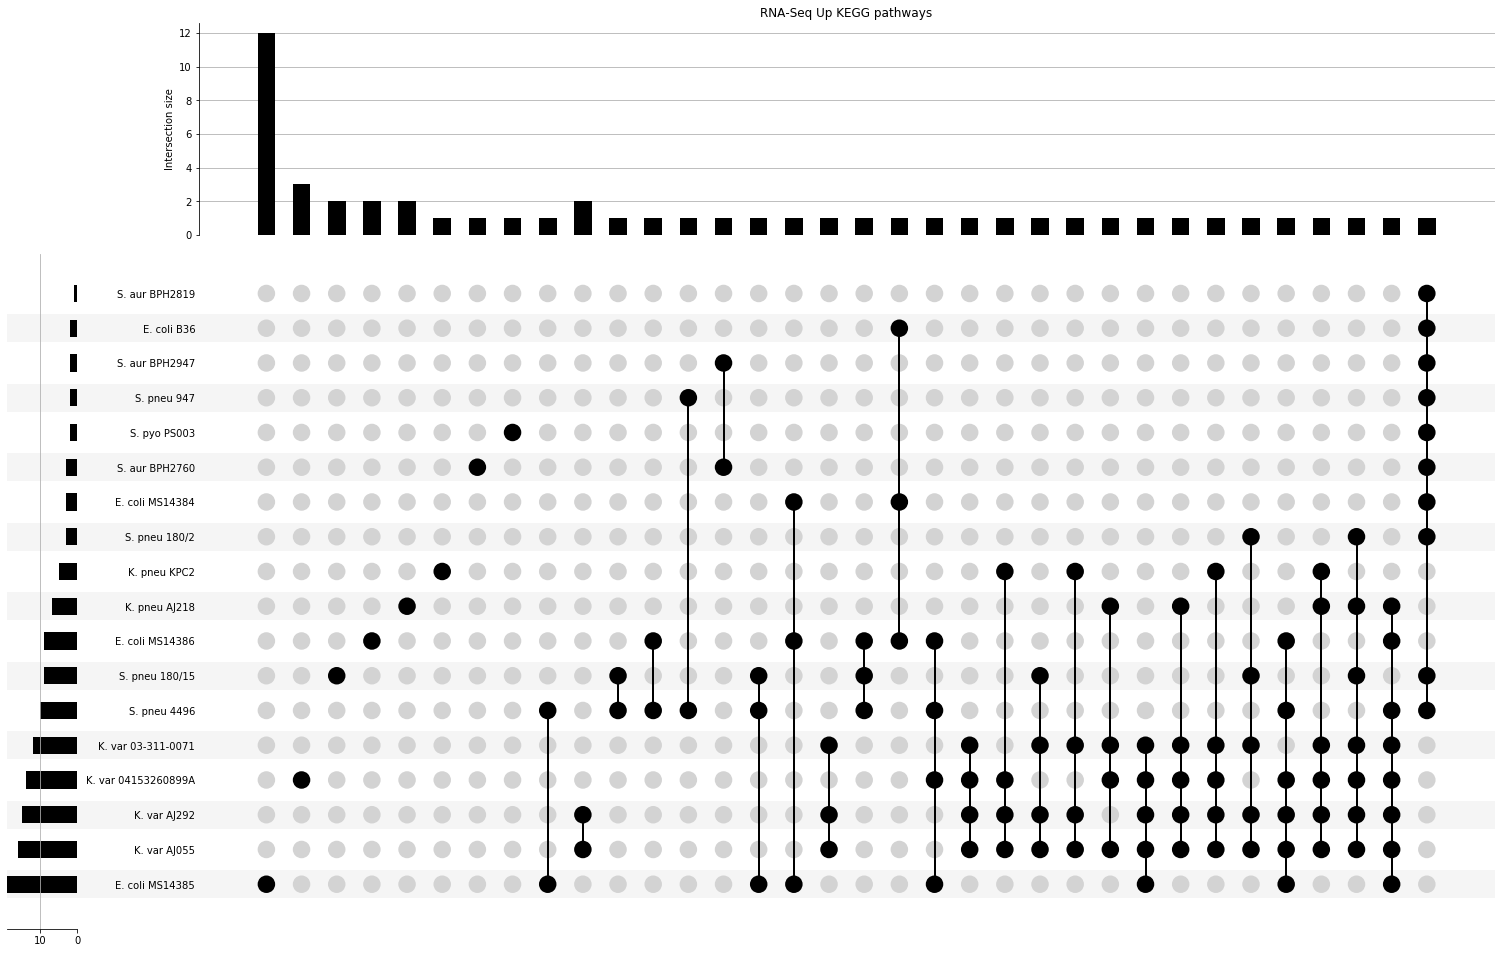

In [15]:
make_upsetplot(reformat_data_for_upsetplot(omics_kegg_direction, "Type_of_Experiment_Direction"))

Next, we export the pathways for *S aureus*. For this organism, all strains and all omics data is available. A few different combinations of visualisations will be attempted. 

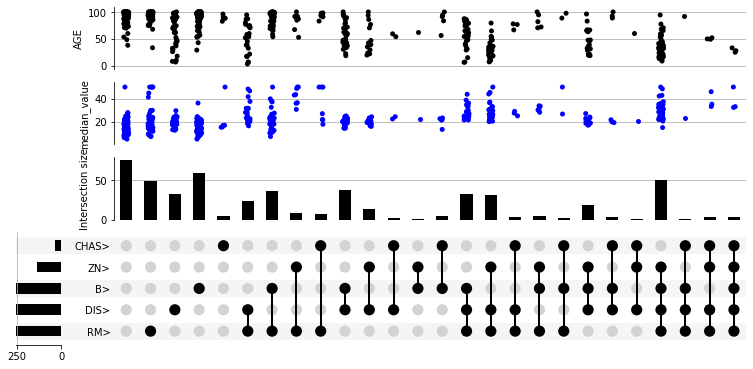

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE  \
CHAS> B>   ZN>   DIS> RM>                                                    
False True True  True True  0.00632  18.0   2.31   0.0  0.538  6.575  65.2   
           False True True  0.02731   0.0   7.07   0.0  0.469  6.421  78.9   
                      True  0.02729   0.0   7.07   0.0  0.469  7.185  61.1   
                      True  0.03237   0.0   2.18   0.0  0.458  6.998  45.8   
                      True  0.06905   0.0   2.18   0.0  0.458  7.147  54.2   

                               DIS  RAD    TAX  PTRATIO       B  LSTAT  \
CHAS> B>   ZN>   DIS> RM>                                                
False True True  True True  4.0900  1.0  296.0     15.3  396.90   4.98   
           False True True  4.9671  2.0  242.0     17.8  396.90   9.14   
                      True  4.9671  2.0  242.0     17.8  392.83   4.03   
                      True  6.0622  3.0  222.0     18.7  394.63   2.94   
                      True  6.0622  3.0  222.0     18.7  396.90   5.33   

                            median_value  
CHAS> B>   ZN>   DIS> RM>                 
False True True  True True          24.0  
           False True True          21.6  
                      True          34.7  
                      True          33.4  
                      True          36.2

In [16]:
# more complex example (reference only, requires scikit-learn and seaborn to be installed)
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from upsetplot import UpSet

# Load the dataset into a DataFrame
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Get five features most correlated with median house value
correls = boston_df.corrwith(pd.Series(boston.target),
                             method='spearman').sort_values()
top_features = correls.index[-5:]

# Get a binary indicator of whether each top feature is above average
boston_above_avg = boston_df > boston_df.median(axis=0)
boston_above_avg = boston_above_avg[top_features]
boston_above_avg = boston_above_avg.rename(columns=lambda x: x + '>')

# Make this indicator mask an index of boston_df
boston_df = pd.concat([boston_df, boston_above_avg],
                      axis=1)
boston_df = boston_df.set_index(list(boston_above_avg.columns))

# Also give us access to the target (median house value)
boston_df = boston_df.assign(median_value=boston.target)

# UpSet plot it!
upset = UpSet(boston_df, subset_size='count', intersection_plot_elements=3)
upset.add_catplot(value='median_value', kind='strip', color='blue')
upset.add_catplot(value='AGE', kind='strip', color='black')
upset.plot()
plt.show()
boston_df.head()